In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [5]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [6]:
df.columns = ['Month','Milk in Pounds per Cow']

In [7]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [9]:
df.drop(168, axis = 0, inplace = True)

In [10]:
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [12]:
df.set_index('Month',inplace = True)

In [13]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [14]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [16]:
# Step 2

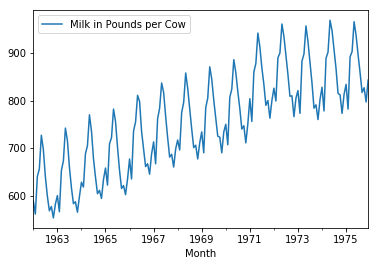

In [17]:
df.plot()

In [18]:
time_series = df['Milk in Pounds per Cow']

In [19]:
type(time_series)

pandas.core.series.Series

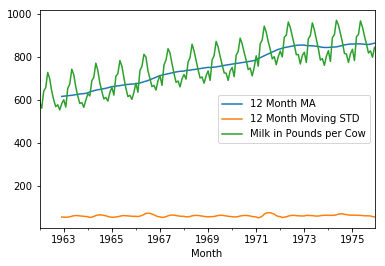

In [20]:
time_series.rolling(12).mean().plot(label = '12 Month MA')
time_series.rolling(12).std().plot(label = '12 Month Moving STD')
time_series.plot()
plt.legend()

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
decomp = seasonal_decompose(time_series, freq = 12)

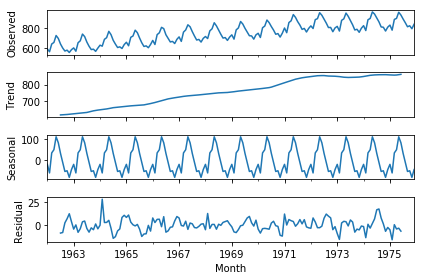

In [23]:
fig = decomp.plot()

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
result = adfuller(df['Milk in Pounds per Cow'])

In [26]:
result

(-1.3038115874221314,
 0.62742670860303074,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [27]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statstic','p-value','# of lags','# of obs']
    
    for value,label in zip(result,labels):
        print(label+" : "+str(value))
        
    if result[1] <= 0.05:
        print("String evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
        
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has unit root and is non-stationary")

In [28]:
adf_check(df['Milk in Pounds per Cow'])

Augmented Dicky-Fuller Test
ADF Test Statstic : -1.30381158742
p-value : 0.627426708603
# of lags : 13
# of obs : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has unit root and is non-stationary


In [29]:
df['1 Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1) 

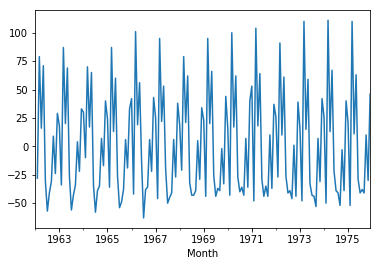

In [30]:
df['1 Difference'].plot()

In [31]:
adf_check(df['1 Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statstic : -3.05499555865
p-value : 0.0300680040018
# of lags : 14
# of obs : 152
String evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [32]:
df['2 difference'] = df['1 Difference'] - df['1 Difference'].shift(1)

In [33]:
adf_check(df['2 difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statstic : -14.3278736456
p-value : 1.11269893321e-26
# of lags : 11
# of obs : 154
String evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


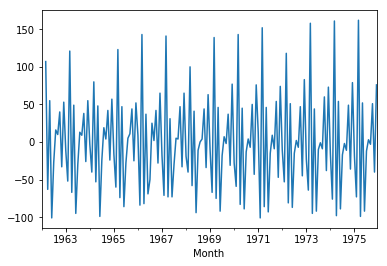

In [34]:
df['2 difference'].plot()

In [35]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)

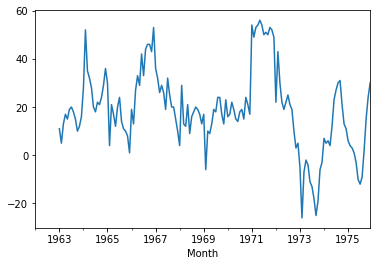

In [36]:
df['Seasonal Difference'].plot()

In [37]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statstic : -2.33541931436
p-value : 0.160798805277
# of lags : 12
# of obs : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has unit root and is non-stationary


In [38]:
df['1 Seasonal Difference'] = df['1 Difference'] - df['1 Difference'].shift(12)

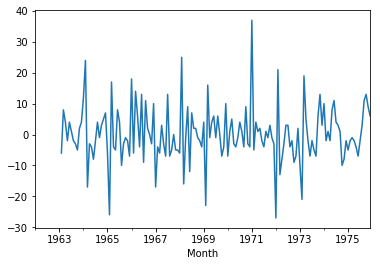

In [39]:
df['1 Seasonal Difference'].plot()

In [40]:
adf_check(df['1 Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statstic : -5.03800227492
p-value : 1.86542343188e-05
# of lags : 11
# of obs : 143
String evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

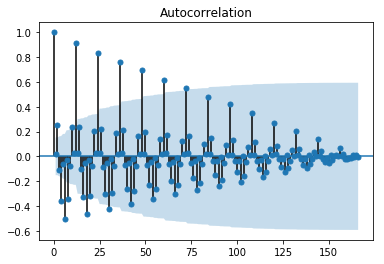

In [42]:
fig_first = plot_acf(df['1 Difference'].dropna())

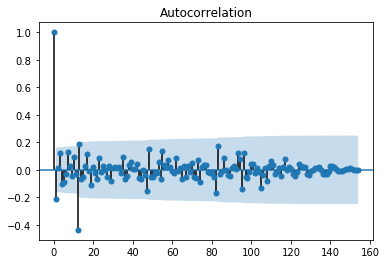

In [43]:
fig_seasonal_first = plot_acf(df['1 Seasonal Difference'].dropna())

In [44]:
from pandas.tools.plotting import autocorrelation_plot

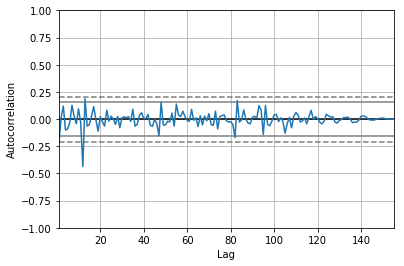

In [45]:
autocorrelation_plot(df['1 Seasonal Difference'].dropna())

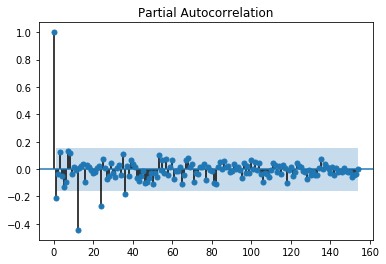

In [46]:
result = plot_pacf(df['1 Seasonal Difference'].dropna())

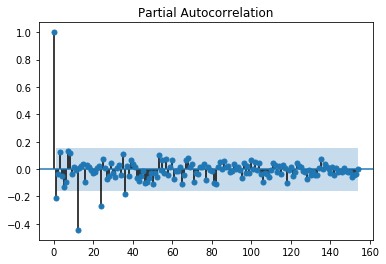

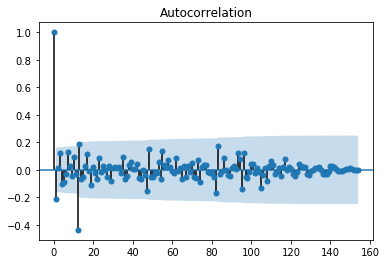

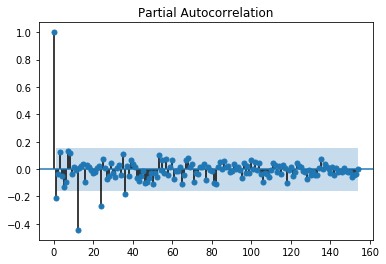

In [47]:
plot_acf(df['1 Seasonal Difference'].dropna())
plot_pacf(df['1 Seasonal Difference'].dropna())

In [48]:
from statsmodels.tsa.arima_model import ARIMA

In [49]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'], order = (0,1,0), seasonal_order = (1,1,1,12))

In [50]:
results = model.fit()

In [51]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Sun, 22 Oct 2017   AIC                           1074.131
Time:                                    23:30:58   BIC                           1083.503
Sample:                                01-01-1962   HQIC                          1077.934
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

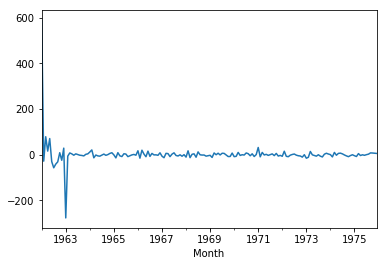

In [52]:
results.resid.plot()

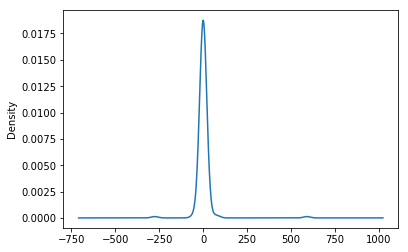

In [53]:
results.resid.plot(kind = 'kde')

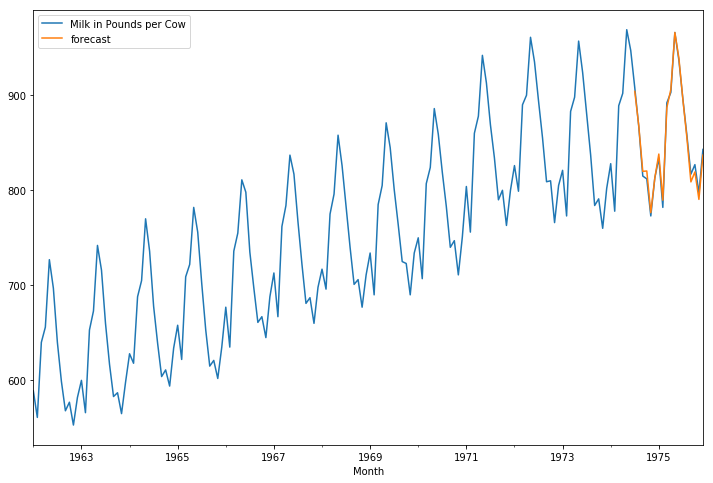

In [55]:
df['forecast'] = results.predict(start = 150, end = 168) # Up to current end point
df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8)) 

In [56]:
# Creating an additional number of rows
from pandas.tseries.offsets import DateOffset

In [58]:
# Grab the last index, use it to offset by +1 month, 24 times = 2 years
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(1,24)]

In [59]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [61]:
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

In [62]:
future_df

,Milk in Pounds per Cow,1 Difference,2 difference,Seasonal Difference,1 Seasonal Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
final_df = pd.concat([df,future_df])

In [66]:
final_df.head()

,Milk in Pounds per Cow,1 Difference,2 difference,Seasonal Difference,1 Seasonal Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [67]:
final_df.tail()

,Milk in Pounds per Cow,1 Difference,2 difference,Seasonal Difference,1 Seasonal Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
final_df['forecast'] = results.predict(start = 168, end = 192)

In [69]:
final_df.tail()

,Milk in Pounds per Cow,1 Difference,2 difference,Seasonal Difference,1 Seasonal Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525751
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918840
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881041
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027162
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962873


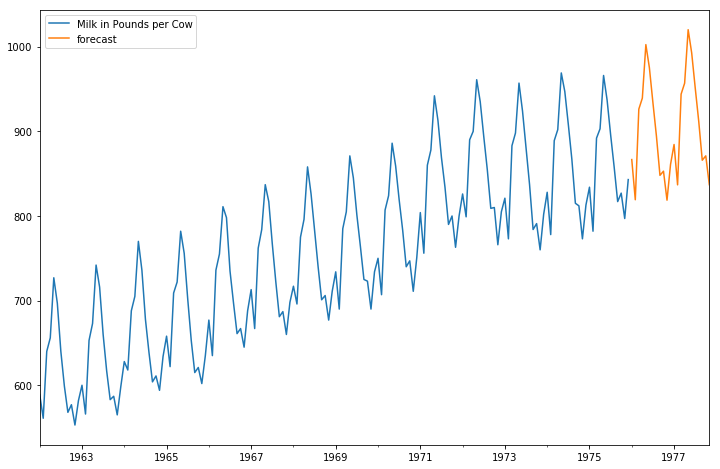

In [70]:
final_df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))